In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("loan_approval_dataset.csv")

In [3]:
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


####EDA and Feature enginerring of the dataset

In [4]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [5]:
len(data.columns)

13

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [7]:
data[" education"].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [8]:
mapping={
    ' Graduate':1,
    ' Not Graduate':0
}

In [9]:
data[" education"]=data[" education"].map(mapping)

In [10]:
data[" self_employed"].unique()

array([' No', ' Yes'], dtype=object)

In [11]:
mapping={' Yes':1,' No':0}

In [12]:
data[" self_employed"]=data[" self_employed"].map(mapping)

In [13]:
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [14]:
data.drop("loan_id",axis=1,inplace=True)

In [15]:
data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [16]:
data.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

<Axes: xlabel=' no_of_dependents', ylabel='count'>

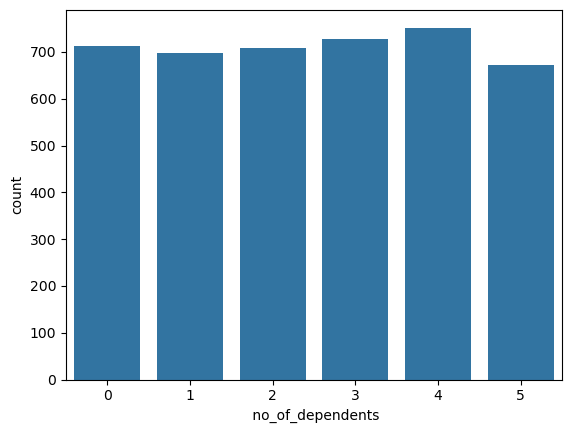

In [17]:
sns.countplot(x=data[" no_of_dependents"],data=data)

<Axes: xlabel=' no_of_dependents', ylabel='count'>

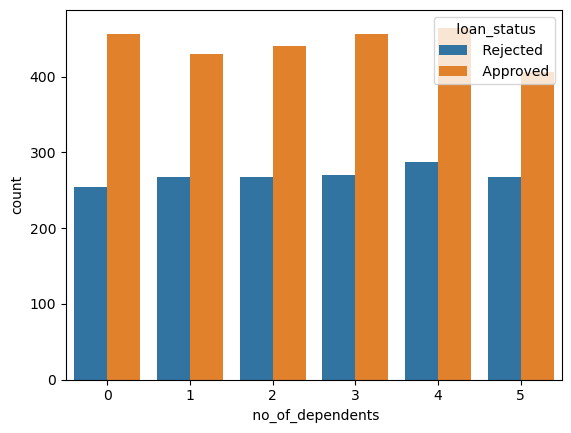

In [18]:
sns.countplot(x=data[" no_of_dependents"],hue=data[" loan_status"],data=data)

##it does not have very much dependency that how many dependents are there for the loan

<Axes: xlabel=' education', ylabel='count'>

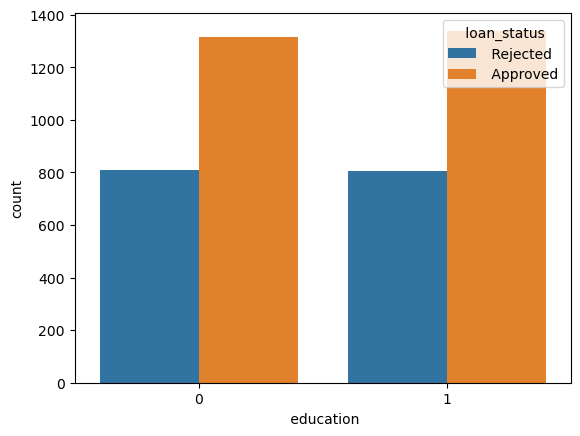

In [19]:
sns.countplot(x=data[" education"],hue=data[" loan_status"],data=data)

##therefore there are equal loan approval for both educated and uneducated people

<Axes: xlabel=' self_employed', ylabel='count'>

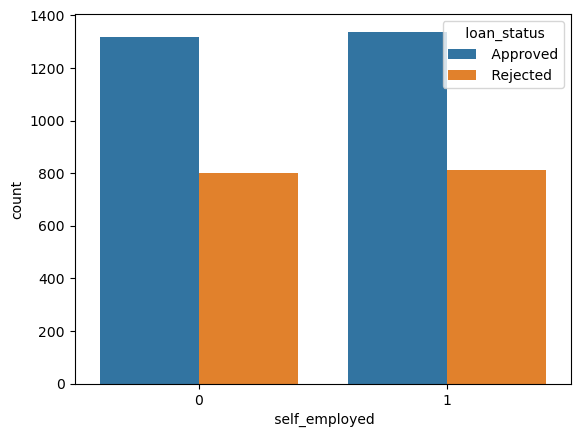

In [20]:
sns.countplot(x=data[" self_employed"],hue=data[" loan_status"],data=data)

#self_employed or non-self_employed have equal no of approval rates

combining all the assets

In [21]:
data[" total_assets"]=data[" residential_assets_value"]+data[" commercial_assets_value"]+data[" luxury_assets_value"]

In [22]:
data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,total_assets
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,42700000
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,13700000
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,44900000
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,44800000
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,50000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected,6600000
4265,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved,18100000
4266,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected,31700000
4267,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved,23000000


In [23]:
data.drop([" residential_assets_value"," commercial_assets_value"," luxury_assets_value"],axis=1,inplace=True)

In [24]:
data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,bank_asset_value,loan_status,total_assets
0,2,1,0,9600000,29900000,12,778,8000000,Approved,42700000
1,0,0,1,4100000,12200000,8,417,3300000,Rejected,13700000
2,3,1,0,9100000,29700000,20,506,12800000,Rejected,44900000
3,3,1,0,8200000,30700000,8,467,7900000,Rejected,44800000
4,5,0,1,9800000,24200000,20,382,5000000,Rejected,50000000
...,...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,800000,Rejected,6600000
4265,0,0,1,3300000,11300000,20,559,1900000,Approved,18100000
4266,2,0,0,6500000,23900000,18,457,7300000,Rejected,31700000
4267,1,0,0,4100000,12800000,8,780,5800000,Approved,23000000


annunal income vs loan_status

In [25]:
bins = np.arange(
    data[' income_annum'].min(),
    data[' income_annum'].max() + 1000000,
    1000000
)

labels = [f"({int(bins[i]/100000)}-{int(bins[i+1]/100000)})*100k"
          for i in range(len(bins)-1)]

data[' income_group'] = pd.cut(
    data[' income_annum'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

<Axes: xlabel=' income_group', ylabel='count'>

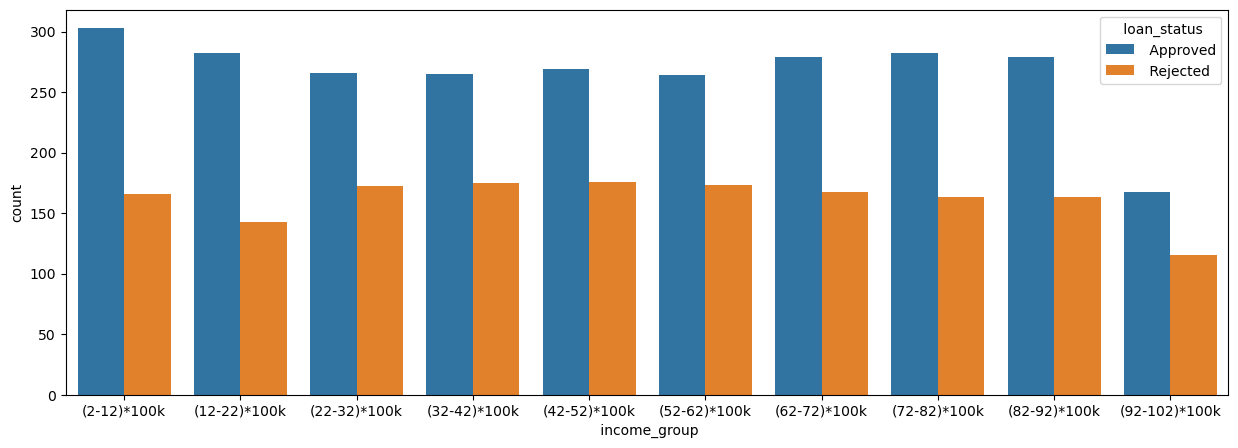

In [26]:
plt.figure(figsize=(15,5))

sns.countplot(
    x=' income_group',
    hue=' loan_status',
    data=data,legend=True
)


we can't describe anything from this data

cibil score vs loan_status

In [27]:
bins=np.arange(data[" cibil_score"].min(),data[" cibil_score"].max()+75,75)
labels=[f"{int(bins[i])}-{int(bins[i+1])}"for i in range(len(bins)-1)]
data[" cibil_group"]=pd.cut(data[" cibil_score"],bins=bins,labels=labels,include_lowest=True)

<Axes: xlabel=' cibil_group', ylabel='count'>

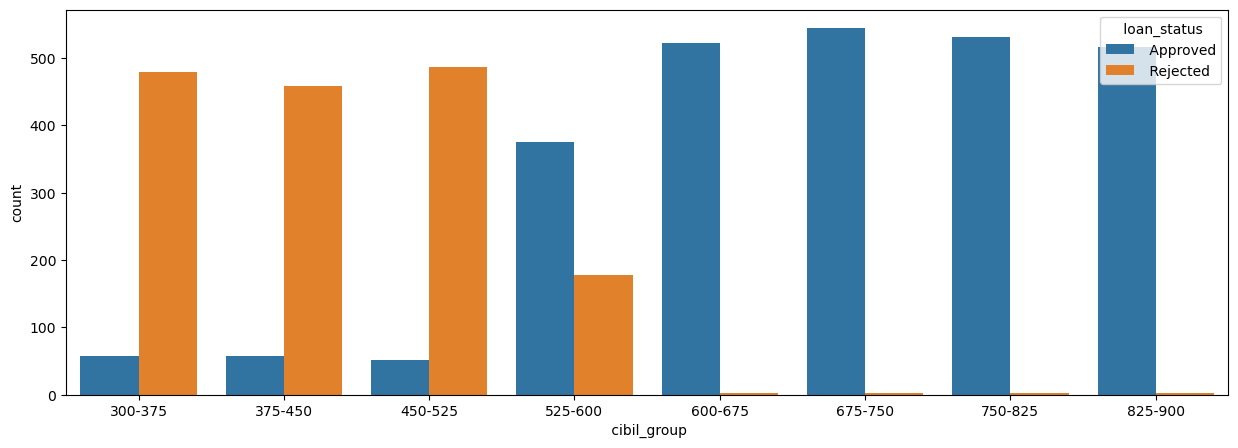

In [28]:
plt.figure(figsize=(15,5))
sns.countplot(x=" cibil_group",hue=" loan_status",data=data,legend=True)

therefore cibil score is very important for loan approval rate, therefore it will also have a higher weight once the model is trained

by the data we got to know that after the score of 525+ loan approval chances improves drastically.

total_assets vs loan_approval

In [29]:
bins=np.arange(data[" total_assets"].min(),data[" total_assets"].max()+10000000,10000000)

In [30]:
labels=[f"({int(bins[i]/100000)}-{int(bins[i+1]/100000)})100k"for i in range(len(bins)-1)]

In [31]:
data[" total_assets_group"]=pd.cut(data[" total_assets"],bins=bins,labels=labels,include_lowest=True)

<Axes: xlabel=' total_assets_group', ylabel='count'>

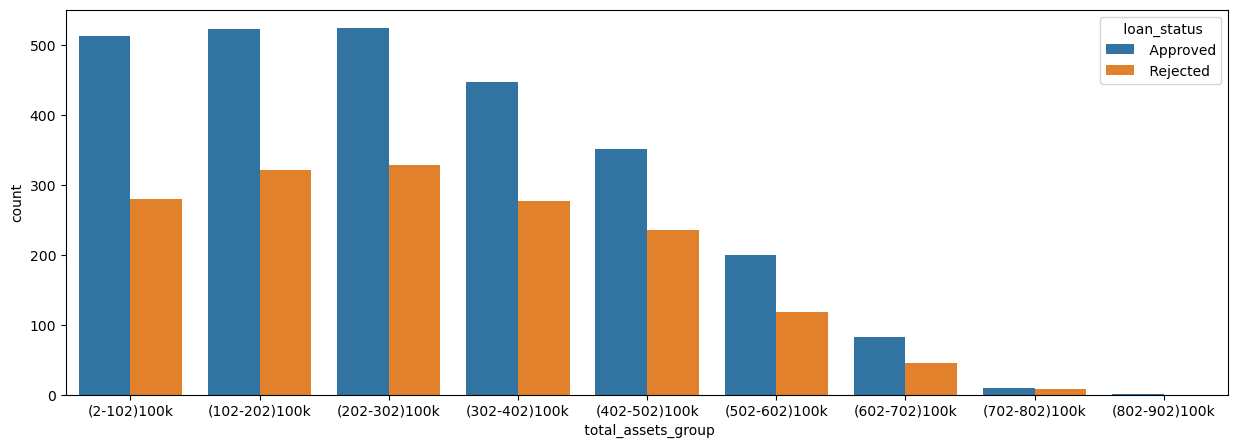

In [32]:
plt.figure(figsize=(15,5))
sns.countplot(x=" total_assets_group",hue=" loan_status",data=data,legend=True)

therefore loan disapproval rates drastically decreases with increase in value of total assests value.

loan_term observation on loan_status

<Axes: xlabel=' loan_term', ylabel='count'>

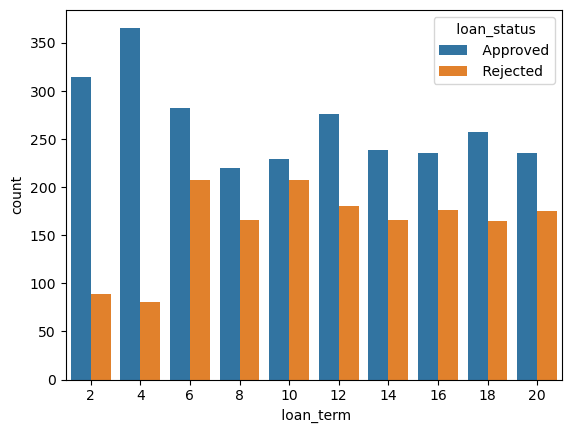

In [33]:
sns.countplot(x=" loan_term",hue=" loan_status",data=data,legend=True)

by this we can observe that shortterms loan(1-4 yrs) are approved quickly incompre to long term loans

In [34]:
data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,bank_asset_value,loan_status,total_assets,income_group,cibil_group,total_assets_group
0,2,1,0,9600000,29900000,12,778,8000000,Approved,42700000,(92-102)*100k,750-825,(402-502)100k
1,0,0,1,4100000,12200000,8,417,3300000,Rejected,13700000,(32-42)*100k,375-450,(102-202)100k
2,3,1,0,9100000,29700000,20,506,12800000,Rejected,44900000,(82-92)*100k,450-525,(402-502)100k
3,3,1,0,8200000,30700000,8,467,7900000,Rejected,44800000,(72-82)*100k,450-525,(402-502)100k
4,5,0,1,9800000,24200000,20,382,5000000,Rejected,50000000,(92-102)*100k,375-450,(402-502)100k
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,800000,Rejected,6600000,(2-12)*100k,300-375,(2-102)100k
4265,0,0,1,3300000,11300000,20,559,1900000,Approved,18100000,(32-42)*100k,525-600,(102-202)100k
4266,2,0,0,6500000,23900000,18,457,7300000,Rejected,31700000,(62-72)*100k,450-525,(302-402)100k
4267,1,0,0,4100000,12800000,8,780,5800000,Approved,23000000,(32-42)*100k,750-825,(202-302)100k


In [35]:
data.drop([" income_group"," cibil_group"," total_assets_group"],axis=1,inplace=True)

In [36]:
data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,bank_asset_value,loan_status,total_assets
0,2,1,0,9600000,29900000,12,778,8000000,Approved,42700000
1,0,0,1,4100000,12200000,8,417,3300000,Rejected,13700000
2,3,1,0,9100000,29700000,20,506,12800000,Rejected,44900000
3,3,1,0,8200000,30700000,8,467,7900000,Rejected,44800000
4,5,0,1,9800000,24200000,20,382,5000000,Rejected,50000000
...,...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,800000,Rejected,6600000
4265,0,0,1,3300000,11300000,20,559,1900000,Approved,18100000
4266,2,0,0,6500000,23900000,18,457,7300000,Rejected,31700000
4267,1,0,0,4100000,12800000,8,780,5800000,Approved,23000000


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0    no_of_dependents  4269 non-null   int64 
 1    education         4269 non-null   int64 
 2    self_employed     4269 non-null   int64 
 3    income_annum      4269 non-null   int64 
 4    loan_amount       4269 non-null   int64 
 5    loan_term         4269 non-null   int64 
 6    cibil_score       4269 non-null   int64 
 7    bank_asset_value  4269 non-null   int64 
 8    loan_status       4269 non-null   object
 9    total_assets      4269 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 333.6+ KB


In [41]:
target=data[" loan_status"]

In [42]:
mapping={" Approved":1," Rejected":0}

In [43]:
target=target.map(mapping)

In [44]:
target

0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name:  loan_status, Length: 4269, dtype: int64

In [45]:
target.shape

(4269,)

In [46]:
data.drop(" loan_status",axis=1,inplace=True)

##Data pre-processing

As we that between many features there is data which is very different from each other having larger difference between the means and variance, 
therefore we will use standard scalar which will make every features mean=0 and variance=1, due to which model will not give more importance to a particular feature just because of thier large value

for regression models all the features data should be on same or very close to mean and variance.So that model doesn't give any unnecessary advantage
to other features

StandarScaler works on the principle-:
z=(z-u)/std

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()

In [49]:
data=scaler.fit_transform(data)

In [50]:
data

array([[-0.2941017 ,  0.99555917, -1.00728821, ...,  1.03279241,
         0.93030441,  0.89568471],
       [-1.4735476 , -1.00446064,  0.99276452, ..., -1.06105118,
        -0.51593638, -0.82132945],
       [ 0.29562125,  0.99555917, -1.00728821, ..., -0.54484044,
         2.40731629,  1.02594096],
       ...,
       [-0.2941017 , -1.00446064, -1.00728821, ..., -0.82904635,
         0.71490685,  0.24440348],
       [-0.88382465, -1.00446064, -1.00728821, ...,  1.04439265,
         0.25334064, -0.27070077],
       [-0.88382465,  0.99555917, -1.00728821, ...,  0.04097176,
         2.16114764,  2.23377161]], shape=(4269, 9))

Model Training Begins

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.33, random_state=42)

In [53]:
from sklearn.linear_model import LogisticRegression

In [59]:
model=LogisticRegression(penalty='l2', C=0.5, tol=0.0001, fit_intercept=True, intercept_scaling=1,
                   class_weight=None, random_state=None, solver='lbfgs', max_iter=300, verbose=0, warm_start=False, n_jobs=None)

In [60]:
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.5
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [61]:
y_predict=model.predict(X_test)

In [62]:
from sklearn.metrics import classification_report

In [63]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       522
           1       0.92      0.92      0.92       887

    accuracy                           0.90      1409
   macro avg       0.90      0.90      0.90      1409
weighted avg       0.90      0.90      0.90      1409

